In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
num_users = 10
num_exercises = 50
max_attempts_per_user = 100

data = []
for user_id in range(1, num_users + 1):
    num_attempts = np.random.randint(1, max_attempts_per_user + 1)
    start_time = datetime.now() - timedelta(days=np.random.randint(1, 365))
    
    for _ in range(num_attempts):
        exercise_id = np.random.randint(1, num_exercises + 1)
        discrete_score = np.random.choice([0, 1])
        data.append({
            "user_xid": user_id,
            "old_problem_id": exercise_id,
            "discrete_score": discrete_score,
            "start_time": start_time
        })
        
        start_time += timedelta(minutes=np.random.randint(1, 60))
sample_df = pd.DataFrame(data)

print(sample_df.head())

   user_xid  old_problem_id  discrete_score                 start_time
0         1               6               1 2024-08-16 22:27:13.092782
1         1              32               0 2024-08-16 22:28:13.092782
2         1              22               1 2024-08-16 23:06:13.092782
3         1              18               1 2024-08-16 23:36:13.092782
4         1              23               0 2024-08-17 00:35:13.092782


In [2]:
from SAKT_model import SAKTModel

In [7]:
train_df = sample_df.sample(frac=0.8, random_state=42)
val_df = sample_df.drop(train_df.index)

model = SAKTModel()
model.fit(train_df=train_df, val_df=val_df, num_epochs=50, early_stopping=False, patience=1)



Using device: /CPU:0


Epoch 1/50 [Train]: 100%|██████| 24/24 [00:02<00:00,  9.50it/s, loss=0.8648, auc=0.5119, acc=0.5182]


Epoch 1/50: Loss=0.8648, AUC=0.5119, Accuracy=0.5182


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 27.75it/s, loss=0.7205, auc=0.5760, acc=0.5938]


Validation: Loss=0.7205, AUC=0.5760, Accuracy=0.5938


Epoch 2/50 [Train]: 100%|██████| 24/24 [00:00<00:00, 47.71it/s, loss=0.7632, auc=0.4803, acc=0.4948]


Epoch 2/50: Loss=0.7632, AUC=0.4803, Accuracy=0.4948


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 68.90it/s, loss=0.6988, auc=0.6813, acc=0.5938]


Validation: Loss=0.6988, AUC=0.6813, Accuracy=0.5938


Epoch 3/50 [Train]: 100%|██████| 24/24 [00:00<00:00, 47.67it/s, loss=0.7273, auc=0.5278, acc=0.5339]


Epoch 3/50: Loss=0.7273, AUC=0.5278, Accuracy=0.5339


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 67.35it/s, loss=0.6599, auc=0.6961, acc=0.5938]


Validation: Loss=0.6599, AUC=0.6961, Accuracy=0.5938


Epoch 4/50 [Train]: 100%|██████| 24/24 [00:00<00:00, 47.48it/s, loss=0.7006, auc=0.5458, acc=0.5208]


Epoch 4/50: Loss=0.7006, AUC=0.5458, Accuracy=0.5208


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 66.61it/s, loss=0.6442, auc=0.7022, acc=0.5938]


Validation: Loss=0.6442, AUC=0.7022, Accuracy=0.5938


Epoch 5/50 [Train]: 100%|██████| 24/24 [00:00<00:00, 47.48it/s, loss=0.6794, auc=0.5861, acc=0.5469]


Epoch 5/50: Loss=0.6794, AUC=0.5861, Accuracy=0.5469


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 67.35it/s, loss=0.6078, auc=0.7283, acc=0.6146]


Validation: Loss=0.6078, AUC=0.7283, Accuracy=0.6146


Epoch 6/50 [Train]: 100%|██████| 24/24 [00:00<00:00, 48.05it/s, loss=0.6640, auc=0.6391, acc=0.6042]


Epoch 6/50: Loss=0.6640, AUC=0.6391, Accuracy=0.6042


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 61.80it/s, loss=0.7721, auc=0.6772, acc=0.5938]


Validation: Loss=0.7721, AUC=0.6772, Accuracy=0.5938


Epoch 7/50 [Train]: 100%|██████| 24/24 [00:00<00:00, 47.96it/s, loss=0.7192, auc=0.5536, acc=0.5469]


Epoch 7/50: Loss=0.7192, AUC=0.5536, Accuracy=0.5469


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 68.12it/s, loss=0.6385, auc=0.6892, acc=0.6562]


Validation: Loss=0.6385, AUC=0.6892, Accuracy=0.6562


Epoch 8/50 [Train]: 100%|██████| 24/24 [00:00<00:00, 47.58it/s, loss=0.6461, auc=0.6575, acc=0.5964]


Epoch 8/50: Loss=0.6461, AUC=0.6575, Accuracy=0.5964


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 67.35it/s, loss=0.6673, auc=0.6950, acc=0.5938]


Validation: Loss=0.6673, AUC=0.6950, Accuracy=0.5938


Epoch 9/50 [Train]: 100%|██████| 24/24 [00:00<00:00, 48.34it/s, loss=0.6466, auc=0.6664, acc=0.5938]


Epoch 9/50: Loss=0.6466, AUC=0.6664, Accuracy=0.5938


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 63.10it/s, loss=0.6488, auc=0.6925, acc=0.6250]


Validation: Loss=0.6488, AUC=0.6925, Accuracy=0.6250


Epoch 10/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 47.29it/s, loss=0.6134, auc=0.7089, acc=0.6354]


Epoch 10/50: Loss=0.6134, AUC=0.7089, Accuracy=0.6354


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 64.46it/s, loss=0.6645, auc=0.7015, acc=0.6146]


Validation: Loss=0.6645, AUC=0.7015, Accuracy=0.6146


Epoch 11/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 47.86it/s, loss=0.6101, auc=0.7271, acc=0.6719]


Epoch 11/50: Loss=0.6101, AUC=0.7271, Accuracy=0.6719


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 68.12it/s, loss=0.6169, auc=0.7314, acc=0.6354]


Validation: Loss=0.6169, AUC=0.7314, Accuracy=0.6354


Epoch 12/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 48.05it/s, loss=0.5970, auc=0.7269, acc=0.6484]


Epoch 12/50: Loss=0.5970, AUC=0.7269, Accuracy=0.6484


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 66.61it/s, loss=0.6694, auc=0.7135, acc=0.5833]


Validation: Loss=0.6694, AUC=0.7135, Accuracy=0.5833


Epoch 13/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 48.05it/s, loss=0.5768, auc=0.7610, acc=0.7109]


Epoch 13/50: Loss=0.5768, AUC=0.7610, Accuracy=0.7109


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 65.87it/s, loss=0.6778, auc=0.7364, acc=0.6354]


Validation: Loss=0.6778, AUC=0.7364, Accuracy=0.6354


Epoch 14/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 47.55it/s, loss=0.5866, auc=0.7575, acc=0.7031]


Epoch 14/50: Loss=0.5866, AUC=0.7575, Accuracy=0.7031


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 63.77it/s, loss=0.6605, auc=0.7238, acc=0.6458]


Validation: Loss=0.6605, AUC=0.7238, Accuracy=0.6458


Epoch 15/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 48.10it/s, loss=0.5651, auc=0.7745, acc=0.7109]


Epoch 15/50: Loss=0.5651, AUC=0.7745, Accuracy=0.7109


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 65.16it/s, loss=0.6671, auc=0.7072, acc=0.6562]


Validation: Loss=0.6671, AUC=0.7072, Accuracy=0.6562


Epoch 16/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 48.05it/s, loss=0.5807, auc=0.7543, acc=0.6979]


Epoch 16/50: Loss=0.5807, AUC=0.7543, Accuracy=0.6979


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 64.46it/s, loss=0.8639, auc=0.6943, acc=0.6771]


Validation: Loss=0.8639, AUC=0.6943, Accuracy=0.6771


Epoch 17/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 48.29it/s, loss=0.6528, auc=0.6906, acc=0.6536]


Epoch 17/50: Loss=0.6528, AUC=0.6906, Accuracy=0.6536


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 62.44it/s, loss=0.6153, auc=0.7267, acc=0.6354]


Validation: Loss=0.6153, AUC=0.7267, Accuracy=0.6354


Epoch 18/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 47.96it/s, loss=0.5990, auc=0.7285, acc=0.6849]


Epoch 18/50: Loss=0.5990, AUC=0.7285, Accuracy=0.6849


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 63.10it/s, loss=0.6502, auc=0.7108, acc=0.6562]


Validation: Loss=0.6502, AUC=0.7108, Accuracy=0.6562


Epoch 19/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 47.39it/s, loss=0.5924, auc=0.7719, acc=0.7083]


Epoch 19/50: Loss=0.5924, AUC=0.7719, Accuracy=0.7083


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 63.77it/s, loss=0.6749, auc=0.6966, acc=0.6354]


Validation: Loss=0.6749, AUC=0.6966, Accuracy=0.6354


Epoch 20/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 48.44it/s, loss=0.5575, auc=0.7735, acc=0.7005]


Epoch 20/50: Loss=0.5575, AUC=0.7735, Accuracy=0.7005


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 66.61it/s, loss=0.7672, auc=0.6541, acc=0.5833]


Validation: Loss=0.7672, AUC=0.6541, Accuracy=0.5833


Epoch 21/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 47.29it/s, loss=0.5794, auc=0.7733, acc=0.7266]


Epoch 21/50: Loss=0.5794, AUC=0.7733, Accuracy=0.7266


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 67.36it/s, loss=0.8021, auc=0.7362, acc=0.6354]


Validation: Loss=0.8021, AUC=0.7362, Accuracy=0.6354


Epoch 22/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 47.67it/s, loss=0.6393, auc=0.6994, acc=0.6172]


Epoch 22/50: Loss=0.6393, AUC=0.6994, Accuracy=0.6172


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 64.46it/s, loss=0.7521, auc=0.6745, acc=0.6146]


Validation: Loss=0.7521, AUC=0.6745, Accuracy=0.6146


Epoch 23/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 47.96it/s, loss=0.6315, auc=0.6790, acc=0.6510]


Epoch 23/50: Loss=0.6315, AUC=0.6790, Accuracy=0.6510


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 65.16it/s, loss=0.6981, auc=0.6808, acc=0.6458]


Validation: Loss=0.6981, AUC=0.6808, Accuracy=0.6458


Epoch 24/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 47.77it/s, loss=0.5510, auc=0.7622, acc=0.6953]


Epoch 24/50: Loss=0.5510, AUC=0.7622, Accuracy=0.6953


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 65.16it/s, loss=0.7371, auc=0.6520, acc=0.6146]


Validation: Loss=0.7371, AUC=0.6520, Accuracy=0.6146


Epoch 25/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 47.77it/s, loss=0.5423, auc=0.7756, acc=0.7292]


Epoch 25/50: Loss=0.5423, AUC=0.7756, Accuracy=0.7292


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 65.87it/s, loss=0.7366, auc=0.6835, acc=0.6458]


Validation: Loss=0.7366, AUC=0.6835, Accuracy=0.6458


Epoch 26/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 47.96it/s, loss=0.5106, auc=0.7829, acc=0.7370]


Epoch 26/50: Loss=0.5106, AUC=0.7829, Accuracy=0.7370


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 65.87it/s, loss=0.7688, auc=0.6865, acc=0.6250]


Validation: Loss=0.7688, AUC=0.6865, Accuracy=0.6250


Epoch 27/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 48.15it/s, loss=0.5068, auc=0.7746, acc=0.7396]


Epoch 27/50: Loss=0.5068, AUC=0.7746, Accuracy=0.7396


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 66.61it/s, loss=0.7535, auc=0.6939, acc=0.6458]


Validation: Loss=0.7535, AUC=0.6939, Accuracy=0.6458


Epoch 28/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 47.39it/s, loss=0.5203, auc=0.7576, acc=0.7292]


Epoch 28/50: Loss=0.5203, AUC=0.7576, Accuracy=0.7292


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 67.35it/s, loss=0.9584, auc=0.6505, acc=0.6146]


Validation: Loss=0.9584, AUC=0.6505, Accuracy=0.6146


Epoch 29/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 48.29it/s, loss=0.5112, auc=0.7859, acc=0.7396]


Epoch 29/50: Loss=0.5112, AUC=0.7859, Accuracy=0.7396


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 62.44it/s, loss=0.8508, auc=0.6383, acc=0.6042]


Validation: Loss=0.8508, AUC=0.6383, Accuracy=0.6042


Epoch 30/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 48.28it/s, loss=0.4746, auc=0.8169, acc=0.7656]


Epoch 30/50: Loss=0.4746, AUC=0.8169, Accuracy=0.7656


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 65.16it/s, loss=1.0110, auc=0.6424, acc=0.5729]


Validation: Loss=1.0110, AUC=0.6424, Accuracy=0.5729


Epoch 31/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 47.02it/s, loss=0.4481, auc=0.8355, acc=0.7526]


Epoch 31/50: Loss=0.4481, AUC=0.8355, Accuracy=0.7526


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 66.61it/s, loss=1.0012, auc=0.6395, acc=0.5938]


Validation: Loss=1.0012, AUC=0.6395, Accuracy=0.5938


Epoch 32/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 47.83it/s, loss=0.4847, auc=0.8226, acc=0.7422]


Epoch 32/50: Loss=0.4847, AUC=0.8226, Accuracy=0.7422


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 61.91it/s, loss=0.9056, auc=0.6422, acc=0.5729]


Validation: Loss=0.9056, AUC=0.6422, Accuracy=0.5729


Epoch 33/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 48.15it/s, loss=0.4546, auc=0.8471, acc=0.7526]


Epoch 33/50: Loss=0.4546, AUC=0.8471, Accuracy=0.7526


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 65.87it/s, loss=1.2254, auc=0.6239, acc=0.5833]


Validation: Loss=1.2254, AUC=0.6239, Accuracy=0.5833


Epoch 34/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 47.29it/s, loss=0.4538, auc=0.8538, acc=0.7734]


Epoch 34/50: Loss=0.4538, AUC=0.8538, Accuracy=0.7734


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 67.35it/s, loss=1.1576, auc=0.5918, acc=0.5521]


Validation: Loss=1.1576, AUC=0.5918, Accuracy=0.5521


Epoch 35/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 47.96it/s, loss=0.4093, auc=0.8736, acc=0.7891]


Epoch 35/50: Loss=0.4093, AUC=0.8736, Accuracy=0.7891


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 64.46it/s, loss=1.5261, auc=0.6116, acc=0.6042]


Validation: Loss=1.5261, AUC=0.6116, Accuracy=0.6042


Epoch 36/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 48.15it/s, loss=0.4236, auc=0.8736, acc=0.7760]


Epoch 36/50: Loss=0.4236, AUC=0.8736, Accuracy=0.7760


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 67.35it/s, loss=1.2243, auc=0.6520, acc=0.6146]


Validation: Loss=1.2243, AUC=0.6520, Accuracy=0.6146


Epoch 37/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 48.25it/s, loss=0.4094, auc=0.8783, acc=0.7917]


Epoch 37/50: Loss=0.4094, AUC=0.8783, Accuracy=0.7917


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 65.16it/s, loss=1.3160, auc=0.6514, acc=0.6042]


Validation: Loss=1.3160, AUC=0.6514, Accuracy=0.6042


Epoch 38/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 48.44it/s, loss=0.3936, auc=0.8866, acc=0.8021]


Epoch 38/50: Loss=0.3936, AUC=0.8866, Accuracy=0.8021


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 62.44it/s, loss=1.4701, auc=0.6305, acc=0.5729]


Validation: Loss=1.4701, AUC=0.6305, Accuracy=0.5729


Epoch 39/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 47.58it/s, loss=0.4136, auc=0.8723, acc=0.7943]


Epoch 39/50: Loss=0.4136, AUC=0.8723, Accuracy=0.7943


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 65.16it/s, loss=1.4251, auc=0.6446, acc=0.6146]


Validation: Loss=1.4251, AUC=0.6446, Accuracy=0.6146


Epoch 40/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 47.77it/s, loss=0.3823, auc=0.8981, acc=0.8125]


Epoch 40/50: Loss=0.3823, AUC=0.8981, Accuracy=0.8125


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 65.16it/s, loss=1.3163, auc=0.6669, acc=0.6146]


Validation: Loss=1.3163, AUC=0.6669, Accuracy=0.6146


Epoch 41/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 47.77it/s, loss=0.3688, auc=0.9053, acc=0.8229]


Epoch 41/50: Loss=0.3688, AUC=0.9053, Accuracy=0.8229


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 63.77it/s, loss=1.6671, auc=0.6457, acc=0.6042]


Validation: Loss=1.6671, AUC=0.6457, Accuracy=0.6042


Epoch 42/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 48.05it/s, loss=0.3648, auc=0.9061, acc=0.8021]


Epoch 42/50: Loss=0.3648, AUC=0.9061, Accuracy=0.8021


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 66.61it/s, loss=1.6746, auc=0.6381, acc=0.6250]


Validation: Loss=1.6746, AUC=0.6381, Accuracy=0.6250


Epoch 43/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 48.34it/s, loss=0.3251, auc=0.9258, acc=0.8438]


Epoch 43/50: Loss=0.3251, AUC=0.9258, Accuracy=0.8438


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 66.61it/s, loss=1.9240, auc=0.6235, acc=0.5833]


Validation: Loss=1.9240, AUC=0.6235, Accuracy=0.5833


Epoch 44/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 47.86it/s, loss=0.3601, auc=0.9192, acc=0.8177]


Epoch 44/50: Loss=0.3601, AUC=0.9192, Accuracy=0.8177


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 63.10it/s, loss=1.7633, auc=0.6280, acc=0.6042]


Validation: Loss=1.7633, AUC=0.6280, Accuracy=0.6042


Epoch 45/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 47.72it/s, loss=0.3646, auc=0.9122, acc=0.8255]


Epoch 45/50: Loss=0.3646, AUC=0.9122, Accuracy=0.8255


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 65.16it/s, loss=1.6467, auc=0.5801, acc=0.5833]


Validation: Loss=1.6467, AUC=0.5801, Accuracy=0.5833


Epoch 46/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 47.52it/s, loss=0.4164, auc=0.8880, acc=0.8099]


Epoch 46/50: Loss=0.4164, AUC=0.8880, Accuracy=0.8099


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 65.87it/s, loss=1.4425, auc=0.5938, acc=0.5833]


Validation: Loss=1.4425, AUC=0.5938, Accuracy=0.5833


Epoch 47/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 47.79it/s, loss=0.3517, auc=0.9182, acc=0.8203]


Epoch 47/50: Loss=0.3517, AUC=0.9182, Accuracy=0.8203


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 61.80it/s, loss=1.4775, auc=0.6201, acc=0.6042]


Validation: Loss=1.4775, AUC=0.6201, Accuracy=0.6042


Epoch 48/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 48.60it/s, loss=0.3374, auc=0.9281, acc=0.8255]


Epoch 48/50: Loss=0.3374, AUC=0.9281, Accuracy=0.8255


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 66.01it/s, loss=1.7049, auc=0.6377, acc=0.5938]


Validation: Loss=1.7049, AUC=0.6377, Accuracy=0.5938


Epoch 49/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 47.97it/s, loss=0.3321, auc=0.9227, acc=0.8177]


Epoch 49/50: Loss=0.3321, AUC=0.9227, Accuracy=0.8177


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 65.16it/s, loss=1.7065, auc=0.5670, acc=0.6042]


Validation: Loss=1.7065, AUC=0.5670, Accuracy=0.6042


Epoch 50/50 [Train]: 100%|█████| 24/24 [00:00<00:00, 47.39it/s, loss=0.3001, auc=0.9414, acc=0.8464]


Epoch 50/50: Loss=0.3001, AUC=0.9414, Accuracy=0.8464


Evaluation [Val]: 100%|██████████| 6/6 [00:00<00:00, 61.80it/s, loss=1.5887, auc=0.6435, acc=0.6146]

Validation: Loss=1.5887, AUC=0.6435, Accuracy=0.6146


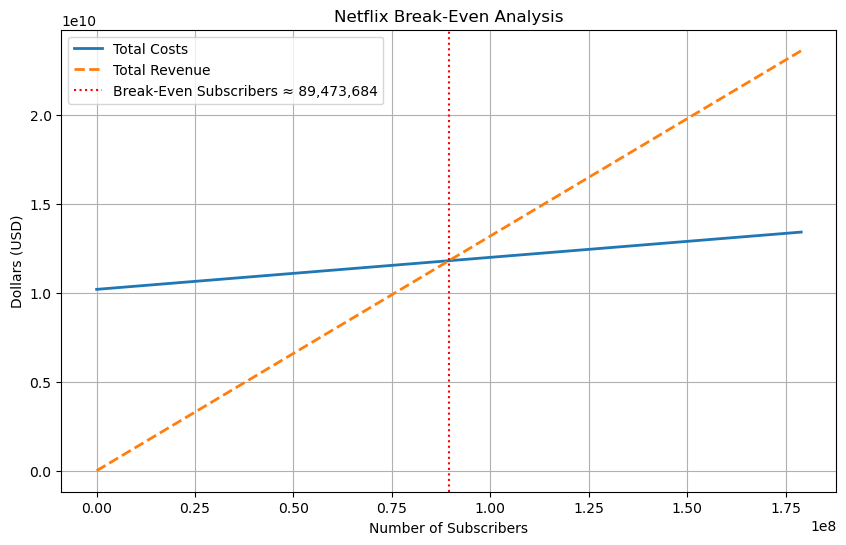

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Based on the given information and calculations, we're using:
# - Fixed cost (F) for original content as $10.2 billion
# - Variable cost (V) per subscriber per year as $18
# - Average Revenue per User (R) per year as $132

# Constants for calculation
fixed_cost = 10_200_000_000  # $10.2 billion
variable_cost_per_subscriber = 18  # $18/year per subscriber
revenue_per_subscriber = 132  # $132/year per subscriber

# Calculate the number of subscribers needed to break even (S)
break_even_subscribers = fixed_cost / (revenue_per_subscriber - variable_cost_per_subscriber)

# Create a range of subscribers from 0 to break-even * 2 for plotting
subscriber_range = np.linspace(0, break_even_subscribers * 2, 500)

# Total costs and revenues based on subscriber range
total_costs = fixed_cost + (variable_cost_per_subscriber * subscriber_range)
total_revenue = revenue_per_subscriber * subscriber_range

# Plot the Break-Even Analysis
plt.figure(figsize=(10, 6))
plt.plot(subscriber_range, total_costs, label='Total Costs', linestyle='-', linewidth=2)
plt.plot(subscriber_range, total_revenue, label='Total Revenue', linestyle='--', linewidth=2)
plt.axvline(break_even_subscribers, color='red', linestyle=':', linewidth=1.5, label=f'Break-Even Subscribers ≈ {break_even_subscribers:,.0f}')

# Formatting the plot
plt.title("Netflix Break-Even Analysis")
plt.xlabel("Number of Subscribers")
plt.ylabel("Dollars (USD)")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

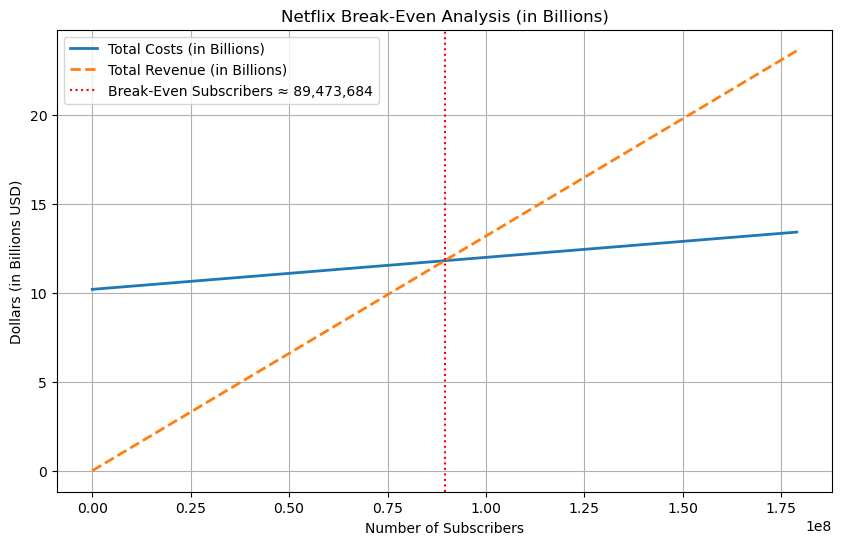

In [9]:
# Adjusting the plot to show values in billions and removing scientific notation (e-notation)

# Convert values to billions
total_costs_billion = total_costs / 1e9  # Converting to billions
total_revenue_billion = total_revenue / 1e9  # Converting to billions
break_even_subscribers_billion_label = break_even_subscribers

# Plot the updated Break-Even Analysis
plt.figure(figsize=(10, 6))
plt.plot(subscriber_range, total_costs_billion, label='Total Costs (in Billions)', linestyle='-', linewidth=2)
plt.plot(subscriber_range, total_revenue_billion, label='Total Revenue (in Billions)', linestyle='--', linewidth=2)
plt.axvline(break_even_subscribers, color='red', linestyle=':', linewidth=1.5, 
            label=f'Break-Even Subscribers ≈ {break_even_subscribers_billion_label:,.0f}')

# Formatting the plot
plt.title("Netflix Break-Even Analysis (in Billions)")
plt.xlabel("Number of Subscribers")
plt.ylabel("Dollars (in Billions USD)")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


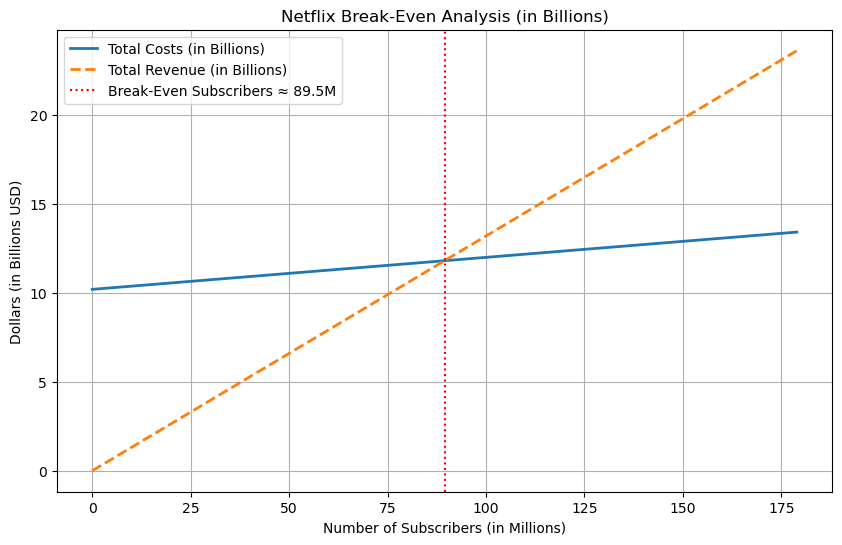

In [10]:
subscriber_range_millions = subscriber_range / 1e6  # Convert to millions

# Plot the updated Break-Even Analysis
plt.figure(figsize=(10, 6))
plt.plot(subscriber_range_millions, total_costs_billion, label='Total Costs (in Billions)', linestyle='-', linewidth=2)
plt.plot(subscriber_range_millions, total_revenue_billion, label='Total Revenue (in Billions)', linestyle='--', linewidth=2)
plt.axvline(break_even_subscribers / 1e6, color='red', linestyle=':', linewidth=1.5, 
            label=f'Break-Even Subscribers ≈ {break_even_subscribers_billion_label / 1e6:,.1f}M')

# Formatting the plot
plt.title("Netflix Break-Even Analysis (in Billions)")
plt.xlabel("Number of Subscribers (in Millions)")
plt.ylabel("Dollars (in Billions USD)")
plt.legend()
plt.grid(True)

# Show plot
plt.show()